In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import torchvision
from torchvision import transforms, datasets, models
import imageio
import time
import warnings
import random
import sys
import copy
import json
from PIL import Image

%matplotlib inline

In [5]:
data_dir = "./dataset/flower_data"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"

In [6]:
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomRotation(45),
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.5),
            transforms.ColorJitter(
                brightness=0.2, contrast=0.1, saturation=0.1, hue=0.1
            ),
            transforms.RandomGrayscale(p=0.025),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
    "valid": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

In [7]:
batch_size = 8
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "valid"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=batch_size, shuffle=True
    )
    for x in ["train", "valid"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "valid"]}
class_names = image_datasets["train"].classes

In [8]:
image_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 6552
     Root location: ./dataset/flower_data/train
     StandardTransform
 Transform: Compose(
                RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(-0.1, 0.1))
                RandomGrayscale(p=0.025)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 'valid': Dataset ImageFolder
     Number of datapoints: 818
     Root location: ./dataset/flower_data/valid
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
            

In [9]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x290fe2050>,
 'valid': <torch.utils.data.dataloader.DataLoader at 0x2910edd10>}

In [10]:
dataset_sizes

{'train': 6552, 'valid': 818}

In [11]:
with open("./dataset/flower_data/cat_to_name.json", "r") as f:
    cat_to_name = json.load(f)

In [12]:
cat_to_name

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

In [13]:
def im_convert(tensor):
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    # move channel from axis 0 to axis 2
    image = image.transpose(1, 2, 0)
    # unnormalize
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    # 
    image = image.clip(0, 1)

    return image

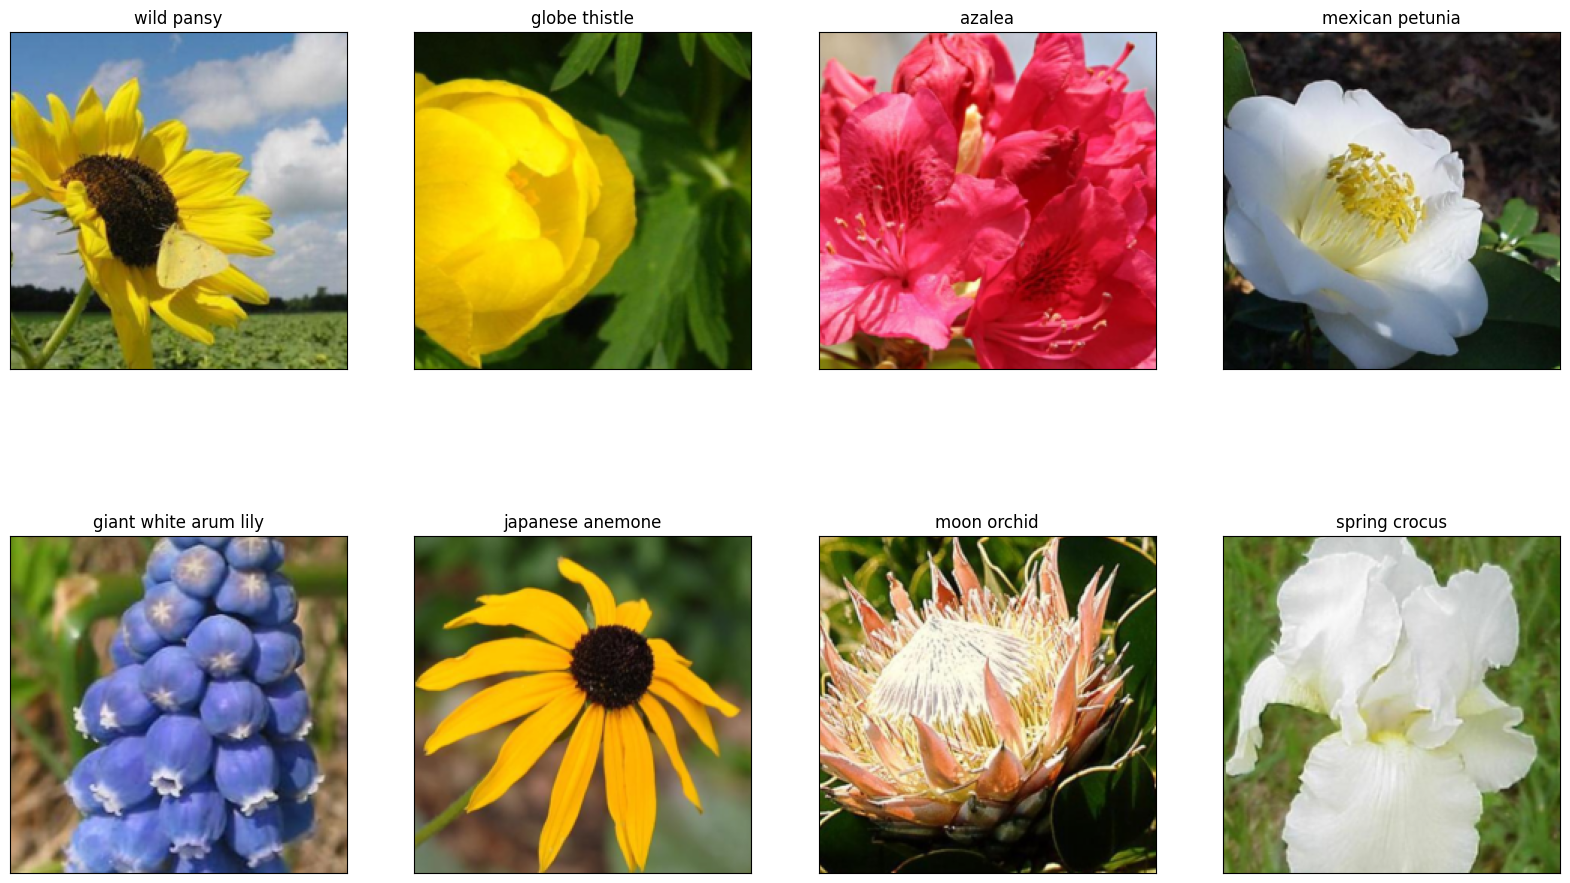

In [15]:
fig = plt.figure(figsize=(20, 12))
columns = 4
rows = 2

dataiter = iter(dataloaders["valid"])
images, classes = next(dataiter)

# display the image
for idx in range(columns * rows):
    ax = fig.add_subplot(rows, columns, idx + 1, xticks=[], yticks=[])
    ax.set_title(cat_to_name[str(classes[idx].item())])
    plt.imshow(im_convert(images[idx]))


plt.show()